# **[GD-8] ÌïúÏòÅ Î≤àÏó≠Í∏∞ ÎßåÎì§Í∏∞**

# üóº Î™©Ï∞®
Step 0. ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞  
Step 1. Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú  
Step 2. Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú  
Step 3. Îç∞Ïù¥ÌÑ∞ ÌÜ†ÌÅ∞Ìôî  
Step 4. Î™®Îç∏ ÏÑ§Í≥Ñ  
Step 5. ÌõàÎ†®ÌïòÍ∏∞  
üåû ÌöåÍ≥†

# **Step 0. ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞**
---

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import os
import re

# print(pandas.__version__)
# print(tensorflow.__version__)
# print(matplotlib.__version__)

# **Step 1. Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú**
---

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)

print("ÏôÑÎ£å!")

ÏôÑÎ£å!


ÌÖêÏÑúÌîåÎ°úÏö∞ÏóêÏÑú Ï†úÍ≥µÌïòÎäî `tf.keras.utils.get_file()` Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïö¥Î°úÎìú Ìï¥Î≥¥Ïûê.  
(`get_file()`Ìï®ÏàòÎäî URLÎ°úÎ∂ÄÌÑ∞ Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïö¥Î∞õÍ≥†, ÏïïÏ∂ïÎêú ÌòïÏãùÏùº Í≤ΩÏö∞ Ìï¥Ï†úÍπåÏßÄ Ìï¥Ï£ºÎäî Ìï®ÏàòÏù¥Îã§.)

In [3]:
path_to_zip = tf.keras.utils.get_file(
    'korean-english-park.train.tar.gz',
    origin='https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz',
    extract=True)

path_to_eng = os.path.dirname(path_to_zip)+"/korean-english-park.train.en"
path_to_kor = os.path.dirname(path_to_zip)+"/korean-english-park.train.ko"

In [4]:
path_to_zip

'/aiffel/.keras/datasets/korean-english-park.train.tar.gz'

Îã§Ïö¥Î°úÎìúÌïú ÏòÅÏñ¥ Îç∞Ïù¥ÌÑ∞Î•º ÏùΩÏùÄ ÌõÑ ÌòïÌÉúÎ•º ÌôïÏù∏Ìï¥Î≥¥Ïûê.

In [5]:
with open(path_to_eng, "r") as f:
    eng_raw = f.read().splitlines()

print("English Data Size:", len(eng_raw))
print("English Example:")

for sen in eng_raw[0:50]: print(">>", sen)

English Data Size: 94123
English Example:
>> Much of personal computing is about "can you top this?"
>> so a mention a few weeks ago about a rechargeable wireless optical mouse brought in another rechargeable, wireless mouse.
>> Like all optical mice, But it also doesn't need a desk.
>> uses gyroscopic sensors to control the cursor movement as you move your wrist, arm, whatever through the air.
>> Intelligence officials have revealed a spate of foiled plots on ships in Southeast Asia and are warning that a narrow stretch of water carrying almost one third of the world's maritime trade is vulnerable to a terror attack.
>> After learning of several foiled al Qaeda attempts on U.S. and commercial ships in the area, experts are warning that the terror network still wants to cripple the global economy, the world's economic jugular vein in Southeast Asia is at risk.
>> Caffeine can help increase reaction time and improve performance for military servicemen who must perform complex tasks or w

Îã§Ïö¥Î°úÎìúÌïú ÌïúÍ∏Ä Îç∞Ïù¥ÌÑ∞Î•º ÏùΩÏùÄ ÌõÑ ÌòïÌÉúÎ•º ÌôïÏù∏Ìï¥Î≥¥Ïûê.

In [6]:
with open(path_to_kor, "r") as f:
    kor_raw = f.read().splitlines()

print("Korean Data Size:", len(kor_raw))
print("Korean Example:")

for sen in kor_raw[0:50]: print(">>", sen)

Korean Data Size: 94123
Korean Example:
>> Í∞úÏù∏Ïö© Ïª¥Ìì®ÌÑ∞ ÏÇ¨Ïö©Ïùò ÏÉÅÎãπ Î∂ÄÎ∂ÑÏùÄ "Ïù¥Í≤ÉÎ≥¥Îã§ Îõ∞Ïñ¥ÎÇ† Ïàò ÏûàÎäêÎÉê?"
>> Î™®Îì† Í¥ëÎßàÏö∞Ïä§ÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄ Î°ú Ïù¥ Í¥ëÎßàÏö∞Ïä§ÎèÑ Ï±ÖÏÉÅ ÏúÑÏóê ÎÜìÎäî ÎßàÏö∞Ïä§ Ìå®ÎìúÎ•º ÌïÑÏöîÎ°ú ÌïòÏßÄ ÏïäÎäîÎã§.
>> Í∑∏Îü¨ÎÇò Ïù¥Í≤ÉÏùÄ ÎòêÌïú Ï±ÖÏÉÅÎèÑ ÌïÑÏöîÎ°ú ÌïòÏßÄ ÏïäÎäîÎã§.
>> 79.95Îã¨Îü¨ÌïòÎäî Ïù¥ ÏµúÏ≤®Îã® Î¨¥ÏÑ† Í¥ëÎßàÏö∞Ïä§Îäî ÌóàÍ≥µÏóêÏÑú ÌåîÎ™©, Ìåî, Í∑∏Ïô∏Ïóê Ïñ¥Îñ§ Î∂ÄÎ∂ÑÏù¥Îì† Í∑∏ ÏõÄÏßÅÏûÑÏóêÎî∞Îùº Ïª§ÏÑúÏùò ÏõÄÏßÅÏûÑÏùÑ Ï°∞Ï†àÌïòÎäî ÌöåÏ†Ñ Ïö¥Îèô ÏÑºÏÑúÎ•º ÏÇ¨Ïö©ÌïòÍ≥† ÏûàÎã§.
>> Ï†ïÎ≥¥ Í¥ÄÎ¶¨Îì§ÏùÄ ÎèôÎÇ® ÏïÑÏãúÏïÑÏóêÏÑúÏùò ÏÑ†Î∞ïÎì§Ïóê ÎåÄÌïú ÎßéÏùÄ (ÌÖåÎü¨) Í≥ÑÌöçÎì§Ïù¥ Ïã§Ìå®Î°ú ÎèåÏïÑÍ∞îÏùåÏùÑ Î∞ùÌòîÏúºÎ©∞, ÏÑ∏Í≥Ñ Ìï¥ÏÉÅ ÍµêÏó≠ÎüâÏùò Í±∞Ïùò 3Î∂ÑÏùò 1ÏùÑ Ïö¥ÏÜ°ÌïòÎäî Ï¢ÅÏùÄ Ìï¥Î°úÏù∏ ÎßêÎùºÏπ¥ Ìï¥ÌòëÏù¥ ÌÖåÎü¨ Í≥µÍ≤©ÏùÑ ÎãπÌïòÍ∏∞ ÏâΩÎã§Í≥† Í≤ΩÍ≥†ÌïòÍ≥† ÏûàÎã§.
>> Ïù¥ ÏßÄÏó≠Ïóê ÏûàÎäî ÎØ∏Íµ≠ ÏÑ†Î∞ïÍ≥º ÏÉÅÏóÖÏö© ÏÑ†Î∞ïÎì§Ïóê ÎåÄÌïú ÏïåÏπ¥ÏóêÎã§Ïùò (ÌÖåÎü¨) ÏãúÎèÑ Ï§ë Ïó¨Îü¨ Í±¥Ïù¥ Ïã§Ìå®ÌñàÎã§Îäî Í≤ÉÏùÑ ÏïåÍ≤å Îêú ÌõÑÏ

ÌïúÍ∏ÄÍ≥º ÏòÅÏñ¥Í∞Ä Ï†ïÌôïÌûà Îß§ÏπòÍ∞Ä ÎêòÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í∏∞ ÏúÑÌïòÏó¨ `DataFrame`ÏúºÎ°ú Î≥ÄÌôòÌï¥Î≥¥Ïûê.

In [7]:
kor_raw_df = pd.DataFrame({'Korean' : kor_raw})
eng_raw_df = pd.DataFrame({'English' : eng_raw})

In [8]:
kor_raw_df

Korean
0                   Í∞úÏù∏Ïö© Ïª¥Ìì®ÌÑ∞ ÏÇ¨Ïö©Ïùò ÏÉÅÎãπ Î∂ÄÎ∂ÑÏùÄ "Ïù¥Í≤ÉÎ≥¥Îã§ Îõ∞Ïñ¥ÎÇ† Ïàò ÏûàÎäêÎÉê?"
1      Î™®Îì† Í¥ëÎßàÏö∞Ïä§ÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄ Î°ú Ïù¥ Í¥ëÎßàÏö∞Ïä§ÎèÑ Ï±ÖÏÉÅ ÏúÑÏóê ÎÜìÎäî ÎßàÏö∞Ïä§ Ìå®ÎìúÎ•º ÌïÑÏöîÎ°ú Ìïò...
2                             Í∑∏Îü¨ÎÇò Ïù¥Í≤ÉÏùÄ ÎòêÌïú Ï±ÖÏÉÅÎèÑ ÌïÑÏöîÎ°ú ÌïòÏßÄ ÏïäÎäîÎã§.
3      79.95Îã¨Îü¨ÌïòÎäî Ïù¥ ÏµúÏ≤®Îã® Î¨¥ÏÑ† Í¥ëÎßàÏö∞Ïä§Îäî ÌóàÍ≥µÏóêÏÑú ÌåîÎ™©, Ìåî, Í∑∏Ïô∏Ïóê Ïñ¥Îñ§ Î∂ÄÎ∂Ñ...
4      Ï†ïÎ≥¥ Í¥ÄÎ¶¨Îì§ÏùÄ ÎèôÎÇ® ÏïÑÏãúÏïÑÏóêÏÑúÏùò ÏÑ†Î∞ïÎì§Ïóê ÎåÄÌïú ÎßéÏùÄ (ÌÖåÎü¨) Í≥ÑÌöçÎì§Ïù¥ Ïã§Ìå®Î°ú ÎèåÏïÑÍ∞î...
...                                                  ...
94118  ‚ÄúÏö∞Î¶¨Îäî 3Ïõî 8Ïùº ÍπÄÏäπÏó∞ ÌöåÏû•Í≥º Í∑∏Ïùò ÏïÑÎì§Ïù¥ Î≥¥Î≥µÌè≠ÌñâÏóê Í∞ÄÎã¥Ìïú ÌòêÏùòÎ•º Ï∞æÍ∏∞ ÏúÑÌï¥ ...
94119   ÏõîÏöîÏùº Ïà†Ïßë Ï¢ÖÏóÖÏõê 6Î™ÖÏùÄ ÍπÄÌöåÏû•Í≥º ÏïÑÎì§ÏóêÍ≤å Ìè≠ÌñâÏùÑ ÎãπÌñàÏùåÏùÑ ÏßÑÏà†ÌñàÎã§Í≥† Í≤ΩÏ∞∞ÏùÄ ÎßêÌñàÎã§.
94120                       Í∑∏Îü¨ÎÇò Î∂àÏ∂©Î∂ÑÌïú Ï¶ùÍ±∞ ÌôïÎ≥¥Î°ú ÏàòÏÇ¨Ïóê Ïñ¥Î†§ÏõÄÏù¥ ÏûàÎã§.
94121                  ÍπÄÌöåÏû•Í≥º Í∑∏Ïùò ÏïÑÎì§ÏùÄ Î≥¥Î≥µÌè≠Ìñâ ÌòêÏùòÎ•º Í∞ïÎ†•Ìûà Î∂ÄÏù∏ÌïòÍ≥† ÏûàÎã§.
94122  Í≤ΩÏ∞∞ÏùÄ ÍπÄÌöåÏû•Ïùò ÏßëÎ¨¥Ïã§ÏóêÏÑú Ï∂îÍ∞Ä Ï¶ùÍ±∞Î•º Ï∞æÏùÄ Ïù¥ÌõÑ Í∞ÄÎä•Ìïú Ìïú Ïò§Îäò ÍπÄÌöåÏû•Í≥º ÏïÑÎì§ÏùÑ ...

[94123 rows x 1 columns]

In [9]:
eng_raw_df

English
0      Much of personal computing is about "can you t...
1      so a mention a few weeks ago about a rechargea...
2      Like all optical mice, But it also doesn't nee...
3      uses gyroscopic sensors to control the cursor ...
4      Intelligence officials have revealed a spate o...
...                                                  ...
94118  ‚Äù‚ÄùWe are hoping to seize material evidence to ...
94119  ‚Äù On Monday, police secured statements from si...
94120  But the lack of material evidence is making it...
94121         Kim and his son both deny the allegations.
94122  Police are planning to seek arrest warrants fo...

[94123 rows x 1 columns]

`pd.merge`Î•º ÏÇ¨Ïö©ÌïòÏó¨ Îëê Í∞úÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ Ìï©Ï≥êÎ≥¥Ïûê.

In [10]:
raw_df = pd.merge(kor_raw_df, eng_raw_df, left_index = True, right_index = True, how = 'left')
raw_df

Korean  \
0                   Í∞úÏù∏Ïö© Ïª¥Ìì®ÌÑ∞ ÏÇ¨Ïö©Ïùò ÏÉÅÎãπ Î∂ÄÎ∂ÑÏùÄ "Ïù¥Í≤ÉÎ≥¥Îã§ Îõ∞Ïñ¥ÎÇ† Ïàò ÏûàÎäêÎÉê?"   
1      Î™®Îì† Í¥ëÎßàÏö∞Ïä§ÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄ Î°ú Ïù¥ Í¥ëÎßàÏö∞Ïä§ÎèÑ Ï±ÖÏÉÅ ÏúÑÏóê ÎÜìÎäî ÎßàÏö∞Ïä§ Ìå®ÎìúÎ•º ÌïÑÏöîÎ°ú Ìïò...   
2                             Í∑∏Îü¨ÎÇò Ïù¥Í≤ÉÏùÄ ÎòêÌïú Ï±ÖÏÉÅÎèÑ ÌïÑÏöîÎ°ú ÌïòÏßÄ ÏïäÎäîÎã§.   
3      79.95Îã¨Îü¨ÌïòÎäî Ïù¥ ÏµúÏ≤®Îã® Î¨¥ÏÑ† Í¥ëÎßàÏö∞Ïä§Îäî ÌóàÍ≥µÏóêÏÑú ÌåîÎ™©, Ìåî, Í∑∏Ïô∏Ïóê Ïñ¥Îñ§ Î∂ÄÎ∂Ñ...   
4      Ï†ïÎ≥¥ Í¥ÄÎ¶¨Îì§ÏùÄ ÎèôÎÇ® ÏïÑÏãúÏïÑÏóêÏÑúÏùò ÏÑ†Î∞ïÎì§Ïóê ÎåÄÌïú ÎßéÏùÄ (ÌÖåÎü¨) Í≥ÑÌöçÎì§Ïù¥ Ïã§Ìå®Î°ú ÎèåÏïÑÍ∞î...   
...                                                  ...   
94118  ‚ÄúÏö∞Î¶¨Îäî 3Ïõî 8Ïùº ÍπÄÏäπÏó∞ ÌöåÏû•Í≥º Í∑∏Ïùò ÏïÑÎì§Ïù¥ Î≥¥Î≥µÌè≠ÌñâÏóê Í∞ÄÎã¥Ìïú ÌòêÏùòÎ•º Ï∞æÍ∏∞ ÏúÑÌï¥ ...   
94119   ÏõîÏöîÏùº Ïà†Ïßë Ï¢ÖÏóÖÏõê 6Î™ÖÏùÄ ÍπÄÌöåÏû•Í≥º ÏïÑÎì§ÏóêÍ≤å Ìè≠ÌñâÏùÑ ÎãπÌñàÏùåÏùÑ ÏßÑÏà†ÌñàÎã§Í≥† Í≤ΩÏ∞∞ÏùÄ ÎßêÌñàÎã§.   
94120                       Í∑∏Îü¨ÎÇò Î∂àÏ∂©Î∂ÑÌïú Ï¶ùÍ±∞ ÌôïÎ≥¥Î°ú ÏàòÏÇ¨Ïóê Ïñ¥Î†§ÏõÄÏù¥ ÏûàÎã§.   
94121                  ÍπÄÌöåÏû•Í≥º Í∑∏Ïùò ÏïÑÎì§ÏùÄ Î≥¥Î≥µÌè≠Ìñâ ÌòêÏùòÎ•º Í∞ïÎ†•Ìûà Î∂ÄÏù∏ÌïòÍ≥† ÏûàÎã§.   
94122  Í≤ΩÏ∞∞ÏùÄ ÍπÄÌöåÏû•Ïùò ÏßëÎ¨¥Ïã§ÏóêÏÑú Ï∂îÍ∞Ä Ï¶ùÍ±∞Î•º Ï∞æÏùÄ Ïù¥ÌõÑ Í∞ÄÎä•Ìïú Ìïú Ïò§Îäò ÍπÄÌöåÏû•Í≥º ÏïÑÎì§ÏùÑ ...   

                                                 English  
0      Much of personal computing is about "can you t...  
1      so a mention a few weeks ago about a rechargea...  
2      Like all optical mice, But it also doesn't nee...  
3      uses gyroscopic sensors to control the cursor ...  
4      Intelligence officials have revealed a spate o...  
...                                                  ...  
94118  ‚Äù‚ÄùWe are hoping to seize material evidence to ...  
94119  ‚Äù On Monday, police secured statements from si...  
94120  But the lack of material evidence is making it...  
94121         Kim and his son both deny the allegations.  
94122  Police are planning to seek arrest warrants fo...  

[94123 rows x 2 columns]

ÌïúÍ∏Ä raw Îç∞Ïù¥ÌÑ∞Ïóê Î≥¥Î©¥ `Ïñ¥Ìúò:`ÎùºÍ≥†Îßå Ïì∞Ïó¨Ï†∏ ÏûàÎäî Î¨∏Ïû•Ïù¥ ÏûàÏóàÎã§. Ïù¥Îü¨Ìïú Î¨∏Ïû•Îì§Ïù¥ ÏñºÎßàÎÇò ÏûàÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Ïûê.

In [11]:
raw_df[raw_df['Korean'].str.contains('Ïñ¥Ìúò :')]

Korean  \
27                                                 Ïñ¥Ìúò :   
30                                                 Ïñ¥Ìúò :   
282                                                Ïñ¥Ìúò :   
318   Ïñ¥Ìúò : examine Î©¥Î∞ÄÌûà Ï°∞ÏÇ¨ÌïòÎã§¬†¬† plight ÏÉÅÌÉú, ÏñëÏÉÅ¬†¬† revive...   
773   Ïñ¥Ìúò : psychologist Ïã¨Î¶¨ÌïôÏûê¬†¬† tactful Ïû¨ÏπòÏûàÎäî¬†¬† no les...   
1064  Ïñ¥Ìúò : in general ÏùºÎ∞òÏ†ÅÏúºÎ°ú ¬†¬†even Ìõ®Ïî¨, ÎçîÏö± ¬†¬†interest...   
1454                           Ïñ¥Ìúò : ÏΩ©Í≥† ÌôîÏÇ∞ Ìè≠Î∞úÎ°ú 40Î™Ö Ïù¥ÏÉÅ ÏÇ¨Îßù   
1456                                               Ïñ¥Ìúò :   
2226                                               Ïñ¥Ìúò :   
3003                                               Ïñ¥Ìúò :   
3100                                               Ïñ¥Ìúò :   
3172                                               Ïñ¥Ìúò :   
3289                                               Ïñ¥Ìúò :   
3329                                               Ïñ¥Ìúò :   
3374                                               Ïñ¥Ìúò :   
3557                                               Ïñ¥Ìúò :   
4404  Ïñ¥Ìúò : concern Ïö∞Î†§, Í±±Ï†ï¬† / unprecedented Ï†ÑÎ°Ä ÏóÜÎäî¬† / ...   
4758                                               Ïñ¥Ìúò :   
5218                                               Ïñ¥Ìúò :   
5278                                               Ïñ¥Ìúò :   
5346                                               Ïñ¥Ìúò :   
5494                                               Ïñ¥Ìúò :   
5514                                               Ïñ¥Ìúò :   
5742                                               Ïñ¥Ìúò :   
5782                                               Ïñ¥Ìúò :   

                                                English  
27    The Geneva-based commission, in its annual stu...  
30    Postal Service - whose postmaster told a Senat...  
282   the United States will take every measure agai...  
318   In our Focus report, Bob Dody examines the pli...  
773   Kenneth Gergen, a Swarthmore College professor...  
1064    Government in general is even less interesting.  
1454  Lava edged with black crust inched through the...  
1456  aid groups set up freshwater tanks to provide ...  
2226  communications with the tiny $4.5 million DASH...  
3003  The upper end of that range would put SG344 on...  
3100  The meeting comes on the heels of a recent UNI...  
3172  About 40 percent of the more than 5,600 partic...  
3289  A study by Australia's main scientific body fo...  
3329  Online merchants share some of the credit for ...  
3374  In much rarer instances, boulders one kilomete...  
3557  Heavy drinkers were one-and-a-half times more ...  
4404  unprecedented control of access lines by high-...  
4758  still experimental but expected to win approva...  
5218  It was approved over the weekend by a U.N. pan...  
5278  A Texas jury found Andrea Yates guilty of capi...  
5346  such as mobile phones, wireless messaging unit...  
5494  shortly after the captain reported a fire in t...  
5514  Tech stocks led the way, and there are high ho...  
5742  China is honing "credible options" and could a...  
5782  The Times of India said members of the Indian ...

- ÏÉùÍ∞ÅÎ≥¥Îã§ Ï†úÎ≤ï ÎßéÏùÄ Î¨∏Ïû•Îì§Ïù¥ Îã®Ïñ¥ÏÇ¨Ï†ÑÍ≥º Í∞ôÏù¥ ÌïúÍ∏ÄÏóêÎäî `Ïñ¥Ìúò:`, ÏòÅÏñ¥ÏóêÎäî ÏòàÎ¨∏Í≥º Í∞ôÏù¥ Í∏∞Ïû¨Ìï¥ÎÜìÏùÄ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.
- Ïù¥Í≤É Ïù¥Ïô∏ÏóêÎèÑ ÌïúÍ∏ÄÍ≥º ÏòÅÏñ¥Í∞Ä Îß§ÏπòÎêòÏßÄ ÏïäÏùÄ Î¨∏Ïû•Îì§ÎèÑ Ï¢ÖÏ¢Ö ÏûàÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÎã§.
- https://github.com/jungyeul/korean-parallel-corpora/issues/1
- ÏúÑÏùò Í≤åÏãúÍ∏ÄÏóêÎèÑ Îç∞Ïù¥ÌÑ∞Ïùò Ïò§Î•òÎ•º ÏßöÏñ¥ÎÜìÏïòÎã§.
- Ïù¥ Î∂ÄÎ∂ÑÏùÑ Ìï®Íªò Í≥†ÎØºÌï¥Ï£ºÏã† @Íµ¨Ïó∞Îãò, @ÏÑ±ÎèàÎãò, @ÎÇ®Ï≤†Îãò Îì± NLP Î∂ÑÎì§ Ï†ïÎßêÎ°ú Í∞êÏÇ¨ÎìúÎ¶ΩÎãàÎã§ :)

# **Step 2. Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú**
---

## 2.1 Ï§ëÎ≥µ Ï†úÍ±∞

Îç∞Ïù¥ÌÑ∞Ïùò Î≥ëÎ†¨ ÏåçÏù¥ ÌùêÌä∏Îü¨ÏßÄÏßÄ ÏïäÍ≤å Ï§ëÎ≥µ Ï†úÍ±∞ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú `zip Ìï®Ïàò`Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÌïòÎÇòÏùò ÌååÏùºÎ°ú Î¨∂Ïñ¥Î≥¥Ïûê.

In [12]:
data = zip(kor_raw, eng_raw)
data

Ï§ëÎ≥µÏùÑ Ï†úÍ±∞ÌïòÍ∏∞ ÏúÑÌï¥ `set`ÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ ÌòïÌÉúÎ•º Î≥ÄÍ≤ΩÌï¥Î≥¥Ïûê.

In [13]:
set_data = set(data)

Ï§ëÎ≥µÏù¥ Ï†úÍ±∞Îêú `set_data`Ïùò Îç∞Ïù¥ÌÑ∞ Í∞úÏàòÎ•º ÌôïÏù∏Ìï¥Î≥¥Ïûê.

In [14]:
len(set_data)

78968

`zip Ìï®Ïàò`Î°ú Î¨∂Ïñ¥ÎÜìÏùÄ Îç∞Ïù¥ÌÑ∞Î•º `*`ÏôÄ `zip Ìï®Ïàò`Î•º ÌôúÏö©ÌïòÏó¨ Îã§Ïãú ÌïúÍ∏Ä, ÏòÅÏñ¥ ÌååÏùºÎ°ú unpackingÌï¥Î≥¥Ïûê.  
[[zip Ìï®Ïàò unpacking]](https://m.blog.naver.com/pmw9440/222058936063)

In [15]:
clean_corpus_kor, clean_corpus_eng = zip(*set_data)

Ï†úÎåÄÎ°ú unpacking ÎêòÏóàÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Ïûê.

In [16]:
clean_corpus_kor[0]

'Ïù¥ ÌòúÏÑ±ÏùÄ Ìè≠Î∞úÌïòÍ≥† ÏûàÏúºÎ©∞ ÌòúÏÑ± Ìïµ ÎëòÎ†àÏùò ÎåÄÍ∏∞Ïù∏ ÏΩîÎßà, Í∞ÄÏä§, Î®ºÏßÄÍ∞Ä ÌÉúÏñëÏóê Î∞òÏÇ¨Îèº ÌÅ¨Í∏∞Í∞Ä ÌñâÏÑ±Ïù∏ Î™©ÏÑ±Î≥¥Îã§ Îçî Ïª§ÏßÄÍ≥† ÏûàÎã§.'

In [17]:
clean_corpus_eng[0]

'The comet is exploding and its coma, a cloud of gas and dust illuminated by the sun, has grown to be bigger than the planet Jupiter.'

ÌïúÍ∏ÄÍ≥º ÏòÅÏñ¥ ÌååÏùºÏùò raw Îç∞Ïù¥ÌÑ∞, Ï§ëÎ≥µÏùÑ Ï†úÍ±∞Ìïú Îç∞Ïù¥ÌÑ∞ ÏàòÎ•º ÌôïÏù∏Ìï¥Î≥¥Ïûê.

In [18]:
print('ÌïúÍ∏Ä raw Îç∞Ïù¥ÌÑ∞ Ïàò : ', len(kor_raw))
print('Ï§ëÎ≥µ Ï†úÍ±∞Ìïú Îç∞Ïù¥ÌÑ∞ Ïàò : ', len(clean_corpus_kor))
print('-----------------')
print('ÏòÅÏñ¥ raw Îç∞Ïù¥ÌÑ∞ Ïàò : ', len(eng_raw))
print('Ï§ëÎ≥µ Ï†úÍ±∞Ìïú Îç∞Ïù¥ÌÑ∞ Ïàò : ', len(clean_corpus_eng))

ÌïúÍ∏Ä raw Îç∞Ïù¥ÌÑ∞ Ïàò :  94123
Ï§ëÎ≥µ Ï†úÍ±∞Ìïú Îç∞Ïù¥ÌÑ∞ Ïàò :  78968
-----------------
ÏòÅÏñ¥ raw Îç∞Ïù¥ÌÑ∞ Ïàò :  94123
Ï§ëÎ≥µ Ï†úÍ±∞Ìïú Îç∞Ïù¥ÌÑ∞ Ïàò :  78968


- ÏïΩ 16,000Í∞úÍ∞Ä Ï§ëÎ≥µÎêòÏñ¥ Ï†úÍ±∞Îêú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

## 2.2 Ï†ïÍ∑úÌëúÌòÑÏãù ÌôúÏö©

Ï†ïÍ∑úÌëúÌòÑÏãùÏùÑ ÌôúÏö©ÌïòÏó¨ Î∂àÌïÑÏöîÌïú Î¨∏ÏûêÎ•º Ï†úÍ±∞Ìï¥Î≥¥Ïûê.

In [19]:
from konlpy.tag import Mecab

In [20]:
def preprocess_sentence_kor(sentence, s_token=False, e_token=False):
    sentence = sentence.lower().strip()

    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)   # \1 : ÏïûÏùò Ï≤´ Î≤àÏß∏ Í∑∏Î£πÏùÑ ÎúªÌï® / Ï≤´ Î≤àÏß∏ Í∑∏Î£πÏóê ÏûàÎäî Î¨∏Ïûê Ïïû Îí§Î°ú Í≥µÎ∞± Ï∂îÍ∞Ä
    sentence = re.sub(r'[" "]+', " ", sentence)     # Ïó¨Îü¨ Í∞úÏùò Í≥µÎ∞±ÏùÑ ÌïòÎÇòÏùò Í≥µÎ∞±ÏúºÎ°ú Î≥ÄÍ≤Ω
    sentence = re.sub(r"[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£0-9?.!,]+", " ", sentence)   # ÌïúÍ∏Ä, Ïà´Ïûê, ?.!, Ï†úÏô∏Ìïú Í≤ÉÎì§ÏùÑ Í≥µÎ∞±ÏúºÎ°ú Î≥ÄÍ≤Ω

    sentence = sentence.strip()   # Î¨∏ÏûêÏó¥ Ïñë ÎÅùÏóê ÏûàÎäî Í≥µÎ∞± Ï†úÍ±∞
    
    if s_token:
        sentence = '<start> ' + sentence   

    if e_token:
        sentence += ' <end>'
        
    tokenizer = Mecab()
    
    sentence = tokenizer.morphs(sentence)

    return sentence

print("Ïäù~")

Ïäù~


In [21]:
def preprocess_sentence_eng(sentence, s_token=True, e_token=True):
    sentence = sentence.lower().strip()

    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)   # \1 : ÏïûÏùò Ï≤´ Î≤àÏß∏ Í∑∏Î£πÏùÑ ÎúªÌï® / Ï≤´ Î≤àÏß∏ Í∑∏Î£πÏóê ÏûàÎäî Î¨∏Ïûê Ïïû Îí§Î°ú Í≥µÎ∞± Ï∂îÍ∞Ä
    sentence = re.sub(r'[" "]+', " ", sentence)     # Ïó¨Îü¨ Í∞úÏùò Í≥µÎ∞±ÏùÑ ÌïòÎÇòÏùò Í≥µÎ∞±ÏúºÎ°ú Î≥ÄÍ≤Ω
    sentence = re.sub(r"[^a-zA-Z0-9?.!,]+", " ", sentence)   # ÏòÅÏñ¥ ÎåÄÎ¨∏Ïûê, ÏÜåÎ¨∏Ïûê, Ïà´Ïûê, ?.!, Ï†úÏô∏Ìïú Í≤ÉÎì§ÏùÑ Í≥µÎ∞±ÏúºÎ°ú Î≥ÄÍ≤Ω

    sentence = sentence.strip()   # Î¨∏ÏûêÏó¥ Ïñë ÎÅùÏóê ÏûàÎäî Í≥µÎ∞± Ï†úÍ±∞
    
    if s_token:
        sentence = '<start> ' + sentence   

    if e_token:
        sentence += ' <end>'
        
    sentence = sentence.split()
    
    return sentence

print("Ïäù~")

Ïäù~


ÌÜ†ÌÅ∞Ïùò Í∏∏Ïù¥Í∞Ä 40 Ïù¥ÌïòÏù∏ Îç∞Ïù¥ÌÑ∞Î•º ÏÑ†Î≥ÑÌïòÏó¨ `kor_corpus`ÏôÄ `eng_corpus`Î•º Íµ¨Ï∂ïÌï¥Î≥¥Ïûê.

In [22]:
kor_corpus = []
eng_corpus = []

for kor, eng in zip(clean_corpus_kor, clean_corpus_eng):
    tmp_kor = preprocess_sentence_kor(kor)
    tmp_eng = preprocess_sentence_eng(eng)
    
    if len(tmp_kor) <= 40 and len(tmp_eng) <= 40:
        kor_corpus.append(tmp_kor)
        eng_corpus.append(tmp_eng)
    
print(len(kor_corpus))
print(len(eng_corpus))

61489
61489


Ï†úÎåÄÎ°ú Ï†ÑÏ≤òÎ¶¨Í∞Ä Ïûò ÎêòÏóàÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Ïûê.

In [23]:
print('Ï†ïÏ†úÌïú ÌïúÍ∏Ä : ', kor_corpus[300])
print('Ï†ïÏ†úÌïú ÏòÅÏñ¥ : ', eng_corpus[300])

Ï†ïÏ†úÌïú ÌïúÍ∏Ä :  ['Ïù¥', 'Ï∞®Í¥Ä', 'ÏùÄ', '3', 'Î™Ö', 'ÏúºÎ°ú', 'Íµ¨ÏÑ±', 'Îêú', 'ÌååÍ≤¨Îã®', 'ÏùÑ', 'Ïù¥ÎÅå', 'Í≥†', 'Î∂ÅÌïú', 'Ï∏°', 'ÎåÄÌëú', 'Ïù∏', 'ÍπÄÎßåÍ∏∏', 'Ï°∞Íµ≠', 'ÌèâÌôîÌÜµÏùº', 'ÏúÑÏõêÌöå', 'ÏÑúÍ∏∞', 'Íµ≠', 'Î∂Ä', 'Íµ≠Ïû•', 'ÏùÑ', 'ÎßåÎÇ†', 'ÏòàÏ†ï', 'Ïù¥', 'Îã§', '.']
Ï†ïÏ†úÌïú ÏòÅÏñ¥ :  ['<start>', 'rhee', ',', 'heading', 'a', 'three', 'member', 'delegation', ',', 'will', 'meet', 'his', 'north', 'korean', 'counterpart', 'kim', 'man', 'gil', ',', 'a', 'deputy', 'director', 'at', 'the', 'secretariat', 'of', 'the', 'north', 's', 'committee', 'for', 'the', 'peaceful', 'reunification', 'of', 'the', 'fatherland', '.', '<end>']


In [24]:
print('Ï†ïÏ†úÌïú ÌïúÍ∏Ä : ', kor_corpus[10])
print('Ï†ïÏ†úÌïú ÏòÅÏñ¥ : ', eng_corpus[10])

Ï†ïÏ†úÌïú ÌïúÍ∏Ä :  ['ÏòÅÍµ≠', 'ÏôïÏã§', 'ÏùÄ', 'ÏôïÏÑ∏Ïûê', 'Ïª§Ìîå', 'Ïù¥', 'Í≤ÄÏÜå', 'Ìïú', 'Í≤∞ÌòºÏãù', 'ÏùÑ', 'Ïò¨Î¶¨', 'Í≥†', 'Ïã∂', 'Îã§Îäî', 'ÏùòÍ≤¨', 'ÏùÑ', 'Ï°¥Ï§ë', 'Ìïò', 'Ïó¨', 'Ïó¨Ïôï', 'Ïù¥', 'Ïù¥', 'Îì§', 'Ïùò', 'Í≤∞ÌòºÏãù', 'ÏùÑ', 'Î©ÄÎ¶¨ÏÑú', 'ÏßÄÏºúÎ≥º', 'Í≥ÑÌöç', 'Ïù¥', 'ÎùºÍ≥†', 'Î∞ùÌòî', 'Îã§', '.']
Ï†ïÏ†úÌïú ÏòÅÏñ¥ :  ['<start>', 'britain', 's', 'queen', 'elizabeth', 'will', 'not', 'attend', 'the', 'wedding', 'of', 'her', 'eldest', 'son', 'prince', 'charles', 'to', 'his', 'long', 'time', 'partner', 'camilla', 'parker', 'bowles', ',', 'adding', 'to', 'an', 'air', 'of', 'chaos', 'that', 'has', 'surrounded', 'plans', 'for', 'the', 'day', '.', '<end>']


In [25]:
kor_corpus[:5]

[['Ïù¥',
  'ÌòúÏÑ±',
  'ÏùÄ',
  'Ìè≠Î∞ú',
  'Ìïò',
  'Í≥†',
  'Ïûà',
  'ÏúºÎ©∞',
  'ÌòúÏÑ±',
  'Ìïµ',
  'ÎëòÎ†à',
  'Ïùò',
  'ÎåÄÍ∏∞',
  'Ïù∏',
  'ÏΩîÎßà',
  ',',
  'Í∞ÄÏä§',
  ',',
  'Î®ºÏßÄ',
  'Í∞Ä',
  'ÌÉúÏñë',
  'Ïóê',
  'Î∞òÏÇ¨',
  'Îèº',
  'ÌÅ¨Í∏∞',
  'Í∞Ä',
  'ÌñâÏÑ±',
  'Ïù∏',
  'Î™©ÏÑ±',
  'Î≥¥Îã§',
  'Îçî',
  'Ïª§',
  'ÏßÄ',
  'Í≥†',
  'Ïûà',
  'Îã§',
  '.'],
 ['Í∑∏',
  'Îäî',
  'ÎØ∏Íµ≠',
  'Ïùò',
  'ÏùåÏ£º',
  'ÏûêÏàò',
  'Í∞Ä',
  'Ï†ÑÏ≤¥',
  '2',
  '3',
  'Ï†ïÎèÑ',
  'Î°ú',
  'Îê†',
  'Í≤É',
  'Ïù¥',
  'ÎùºÍ≥†',
  'Ï∂îÏÇ∞',
  'Ìñà',
  'Îã§',
  '.'],
 ['Í∑∏',
  'Îäî',
  'Ïàò',
  'Î∞±Îßå',
  'Î™Ö',
  'Ïùò',
  'ÏÑ†Îüâ',
  'Ìïú',
  'ÏÇ¨Îûå',
  'Îì§',
  'Ïù¥',
  'Î¨¥Í≥†',
  'Ìïò',
  'Í≤å',
  'Ï£Ω',
  'Ïñ¥',
  'Í∞à',
  'Îïå',
  'Î¨¥Ïä®',
  'ÏßÑÎ≥¥',
  'Í∞Ä',
  'Ïûà',
  'ÏùÑ',
  'Ïàò',
  'Ïûà',
  'Í≤†',
  'ÏäµÎãàÍπå',
  '?'],
 ['ÎåÄÎ≤ïÏõê', 'Ïùò', 'Ïã¨Î¶¨', 'Îäî', '6', 'Ïùº', 'Î∂ÄÌÑ∞', 'ÏãúÏûë', 'Îêê', 'Îã§', '.'],
 ['Îëê',
  'Î™Ö',
  'Ïùò',
  'Ïã≠',
  'ÎåÄ',
  'ÏÜåÎÖÑ',
  'Í≥º',

In [26]:
eng_corpus[:5]

[['<start>',
  'the',
  'comet',
  'is',
  'exploding',
  'and',
  'its',
  'coma',
  ',',
  'a',
  'cloud',
  'of',
  'gas',
  'and',
  'dust',
  'illuminated',
  'by',
  'the',
  'sun',
  ',',
  'has',
  'grown',
  'to',
  'be',
  'bigger',
  'than',
  'the',
  'planet',
  'jupiter',
  '.',
  '<end>'],
 ['<start>',
  'basically',
  ',',
  'they',
  'conducted',
  'the',
  'experiment',
  ',',
  'and',
  'we',
  'studied',
  'it',
  '.',
  '<end>'],
 ['<start>',
  'when',
  'millions',
  'of',
  'people',
  'die',
  'for',
  'no',
  'apparent',
  'reason',
  'the',
  'best',
  'people',
  'what',
  'kind',
  'of',
  'progress',
  'can',
  'there',
  'be',
  '?',
  '<end>'],
 ['<start>', 'the', 'hearing', 'began', 'on', 'sunday', '.', '<end>'],
 ['<start>',
  'two',
  'teenage',
  'boys',
  'and',
  'two',
  'adults',
  'were',
  'shot',
  'while',
  'a',
  'teenage',
  'girl',
  'injured',
  'her',
  'knee',
  'while',
  'fleeing',
  '.',
  '<end>']]

# Step 3. Îç∞Ïù¥ÌÑ∞ ÌÜ†ÌÅ∞Ìôî
---

In [27]:
def tokenize(corpus):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')    # Ìå®Îî©

    return tensor, tokenizer

In [28]:
kor_tensor, kor_tokenizer = tokenize(kor_corpus)
eng_tensor, eng_tokenizer = tokenize(eng_corpus)

In [29]:
print(kor_tensor.shape, eng_tensor.shape)

(61489, 40) (61489, 40)


Í∞Å tensorÏùò Ïù∏Îç±Ïä§ 0Î≤àÏùÑ ÌôïÏù∏Ìï¥Î≥¥Ïûê.

In [30]:
print(kor_tensor[0])

[    3  5571     7   423    11    12    14   106  5571   246 24110     6
  2122    25 15475    17  1097    17  4019    13  2776     8  5572   268
  1573    13  2215    25  8615   172   102  2462    28    12    14     2
     1     0     0     0]


In [45]:
print(eng_tensor[0])

[    3     1  7751    16 13672    10    42 10935     5     8  4530     7
   547    10  3401 13673    25     1  1378     5    23  2942     6    28
  2896    62     1  2144 10056     2     4     0     0     0     0     0
     0     0     0     0]


In [32]:
print('ÌïúÍ∏Ä Vocab Size : ', len(kor_tokenizer.index_word))
print('ÏòÅÏñ¥ Vocab Size : ', len(eng_tokenizer.index_word))

ÌïúÍ∏Ä Vocab Size :  37898
ÏòÅÏñ¥ Vocab Size :  39445


# Step 4. Î™®Îç∏ ÏÑ§Í≥Ñ
---

Í∞ÅÍ∞Å 1Í∞úÏùò GRU(Gated recurrent unit, Í≤åÏù¥Ìä∏ ÏàúÌôò Ïú†Îãõ)Î•º Í∞ñÎäî Encoder-Decoder Íµ¨Ï°∞Î•º ÏÑ§Í≥ÑÌï¥Î≥¥Ïûê.

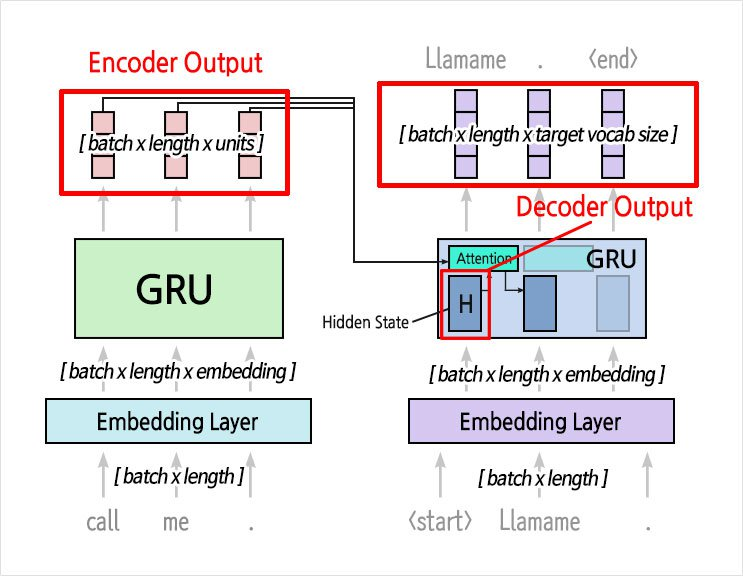

- EncoderÎäî Î™®Îì† Time-StepÏùò Hidden StateÎ•º Ï∂úÎ†•ÏúºÎ°ú Í∞ñÎäîÎã§.
- DecoderÎäî EncoderÏùò Ï∂úÎ†•Í≥º DecoderÏùò t-1 StepÏùò Hidden StateÎ°ú AttentionÏùÑ Ï∑®ÌïòÏó¨ t StepÏùò Hidden StateÎ•º ÎßåÎì§Ïñ¥ÎÇ∏Îã§.
- DecoderÏóêÏÑú t StepÏùò Îã®Ïñ¥Î°ú ÏòàÏ∏°Îêú Í≤ÉÏùÑ Ïã§Ï†ú Ï†ïÎãµÍ≥º ÎåÄÏ°∞Ìï¥ LossÎ•º Íµ¨ÌïòÍ≥†, ÏÉùÏÑ±Îêú t StepÏùò Hidden StateÎäî t+1 StepÏùò Hidden StateÎ•º ÎßåÎì§Í∏∞ ÏúÑÌï¥ Îã§Ïãú DecoderÏóê Ï†ÑÎã¨ÎêúÎã§.

## 4.1 Attention
AttentionÏùÄ `Bahdanau`Î•º ÏÇ¨Ïö©Ìï¥Î≥¥Ïûê.

In [33]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.w_eng = tf.keras.layers.Dense(units)
        self.w_kor = tf.keras.layers.Dense(units)
        self.w_com = tf.keras.layers.Dense(1)
    
    def call(self, h_kor, h_eng):
        h_kor = self.w_kor(h_kor)
        h_eng = tf.expand_dims(h_eng, 1)
        h_eng = self.w_eng(h_eng)

        score = self.w_com(tf.nn.tanh(h_eng + h_kor))
        
        attn = tf.nn.softmax(score, axis=1)

        context_vec = attn * h_kor
        context_vec = tf.reduce_sum(context_vec, axis=1)

        return context_vec, attn

print("Ïäù~")

Ïäù~


## 4.2 Encoder
ÏúÑÏùò Í∑∏Î¶ºÍ≥º Í∞ôÏùÄ Íµ¨Ï°∞Î•º Í∞ñÎäî `Encoder` ÌÅ¥ÎûòÏä§Î•º ÏÑ§Í≥ÑÌï¥Î≥¥Ïûê.

In [34]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, kor_units):
        super(Encoder, self).__init__()
        
        self.kor_units = kor_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(kor_units,
                                       return_sequences=True)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.gru(out)
        
        return out

## 4.3 Decoder
`Decoder` ÌÅ¥ÎûòÏä§Î•º ÏÑ§Í≥ÑÌï¥Î≥¥Ïûê.

In [35]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, eng_units):
        super(Decoder, self).__init__()
        self.eng_units = eng_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(eng_units,
                                       return_sequences=True,
                                       return_state=True)
        self.fc = tf.keras.layers.Dense(vocab_size)

        self.attention = BahdanauAttention(self.eng_units)

    def call(self, x, h_eng, kor_out):
        context_vec, attn = self.attention(kor_out, h_eng)

        out = self.embedding(x)
        out = tf.concat([tf.expand_dims(context_vec, 1), out], axis=-1)
        
        out, h_eng = self.gru(out)
        out = tf.reshape(out, (-1, out.shape[2]))
        out = self.fc(out)

        return out, h_eng, attn

## 4.4 Ïã§Ìñâ

In [36]:
BATCH_SIZE     = 64
SRC_VOCAB_SIZE = len(kor_tokenizer.index_word) + 1
TGT_VOCAB_SIZE = len(eng_tokenizer.index_word) + 1

units         = 1024
embedding_dim = 512

encoder = Encoder(SRC_VOCAB_SIZE, embedding_dim, units)
decoder = Decoder(TGT_VOCAB_SIZE, embedding_dim, units)

# sample input
sequence_len = 30

sample_kor = tf.random.uniform((BATCH_SIZE, sequence_len))
sample_output = encoder(sample_kor)

print ('Encoder Output:', sample_output.shape)

sample_state = tf.random.uniform((BATCH_SIZE, units))

sample_logits, h_eng, attn = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                     sample_state, sample_output)

print ('Decoder Output:', sample_logits.shape)
print ('Decoder Hidden State:', h_eng.shape)
print ('Attention:', attn.shape)

Encoder Output: (64, 30, 1024)
Decoder Output: (64, 39446)
Decoder Hidden State: (64, 1024)
Attention: (64, 30, 1)


# Step 5. ÌõàÎ†®ÌïòÍ∏∞
---

Encoder-Decoder Íµ¨Ï°∞Ïùò Í≤ΩÏö∞, ÏûÖÏ∂úÎ†•Ïù¥ Îã®ÏàúÌïòÏßÄ ÏïäÏïÑ ÌïôÏäµ Í≥ºÏ†ïÏùÑ ÏßÅÏ†ë Ï†ïÏùòÌï¥Ï£ºÏñ¥Ïïº ÌïúÎã§.  
(`fit()`Ìï®ÏàòÎ°ú ÌïôÏäµÌï† Ïàò ÏóÜÏùå)

## 5.1 Optimizer & Loss

In [37]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss = loss_object(real, pred)
    
    mask = tf.cast(mask, dtype=loss.dtype)  # maskÎäî Ï†ïÎãµÏßÄÏóêÏÑú <PAD> ÌÜ†ÌÅ∞ÏùÑ Ï∞æÏïÑÎÇ¥ Í∑∏ Î∂ÄÎ∂ÑÏóê ÎåÄÌïú LossÎ•º Íµ¨ÌïòÏßÄ ÏïäÎèÑÎ°ù ÌïòÎäî Ïó≠Ìï†ÏùÑ Ìï®
    loss *= mask
    
    return tf.reduce_mean(loss)

print("Ïäù~")

Ïäù~


- fit() Ìï®ÏàòÎ•º Ïó¨Í∏∞ÏÑú ÏÇ¨Ïö©Ìï† Ïàò ÏóÜÎäî Ïù¥Ïú†Îäî Loss Ìï®Ïàò ÎïåÎ¨∏Ïù¥Îã§.
- Encoder-Decoder Íµ¨Ï°∞Îäî ÌïôÏäµÍ≥ºÏ†ïÏù¥ ÏùºÎ∞òÏ†ÅÏù¥ÏßÄ ÏïäÏïÑ ÏßÅÏ†ë LossÎ•º Ïª§Ïä§ÌÖÄÌï¥ÏÑú ÏÇ¨Ïö©Ìï¥Ïïº ÌïòÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§.
- `SparseCategoricalCrossentropy()` Ìï®ÏàòÎäî Î™®Îç∏Ïù¥ Ï∂úÎ†•Ìïú ÌôïÎ•† Î∂ÑÌè¨ÏôÄ Ï†ïÏàò Ïù∏Îç±Ïä§ ÎãµÏïàÏùÑ ÎπÑÍµêÌï¥ Cross EntropyÍ∞íÏùÑ Íµ¨Ìï¥Ï§ÄÎã§.
- `from_logits`Îäî ÌôïÎ•†Î∂ÑÌè¨Í∞Ä SotfmaxÎ•º Í±∞Ï≥êÏÑú Îì§Ïñ¥Ïò§ÎäîÏßÄ, Î™®Îç∏Ïùò Ï∂úÎ†•Í∞í Í∑∏ÎåÄÎ°ú Îì§Ïñ¥Ïò§ÎäîÏßÄÎ•º Í≤∞Ï†ïÌïúÎã§.
- `from_logits=True`Î°ú ÏÑ§Ï†ïÌïòÏòÄÏúºÎãà Î™®Îç∏Ïùò Ï∂úÎ†•Í∞íÏùÑ Í∑∏ÎåÄÎ°ú Ï†ÑÎã¨ÌïòÎ©¥ ÎêúÎã§.
- `equal()`Ìï®ÏàòÏóê Ï†ïÌôïÌûàÎäî 0Ïù¥ ÏïÑÎãå `<PAD>` ÌÜ†ÌÅ∞Ïùò Ïù∏Îç±Ïä§Î•º Ï†ÑÎã¨ÌïòÎäî Í≤ÉÏù¥ ÎßûÎã§.
- ÌïòÏßÄÎßå ÎåÄÎ∂ÄÎ∂ÑÏùò Í≤ΩÏö∞Îäî 0ÏúºÎ°ú Ìå®Îî©Ïù¥ ÎêòÍ∏∞ ÎïåÎ¨∏Ïóê Ìé∏ÏùòÏÉÅ 0ÏùÑ Ï†ÑÎã¨ÌïòÏó¨ Ï≤òÎ¶¨ÌïòÎèÑÎ°ù ÌïúÎã§.

## 5.2 train_step Íµ¨ÌòÑÌïòÍ∏∞
`train_step()`ÏùÄ ÌïôÏäµÏóê ÌïÑÏöîÌïú Í≤ÉÏùÑ Î™®Îëê Í∞ÄÏ†∏Í∞Ä LossÎ•º Í≥ÑÏÇ∞Ìïú ÌõÑ Î∞òÌôòÌïòÎäî Ìï®ÏàòÏù¥Îã§.

In [38]:
@tf.function     # Ìï¥Îãπ Îç∞ÏΩîÎ†àÏù¥ÌÑ∞Îäî ÌõàÎ†® Ïô∏Ï†ÅÏù∏ ÌÖêÏÑúÌîåÎ°úÏö∞ Ïó∞ÏÇ∞ÏùÑ GPUÏóêÏÑú ÎèôÏûëÌïòÍ≤å Ìï¥ ÌõàÎ†®ÏùÑ Í∞ÄÏÜçÌï† Ïàò ÏûàÎèÑÎ°ù ÎèÑÏôÄÏ§å
def train_step(src, tgt, encoder, decoder, optimizer, eng_tok):
    bsz = src.shape[0]
    loss = 0

    with tf.GradientTape() as tape:     # ÌïôÏäµÌïòÎ©∞ Î∞úÏÉùÌïú Î™®Îì† Ïó∞ÏÇ∞ÏùÑ Í∏∞Î°ùÌïòÎäî ÌÖåÏù¥ÌîÑ / Î™®Îç∏Ïù¥ Í∞Å Ïä§ÌÖùÏùò ÏµúÏ¢Ö Îã®Í≥ÑÏóêÏÑú ÎØ∏Î∂ÑÍ∞íÏùÑ Íµ¨ÌïòÎäîÎç∞ ÏÇ¨Ïö©
        kor_out = encoder(src)
        h_eng = kor_out[:, -1]   # t = 0Ïùº Îïå, DecoderÏùò Hidden StateÎäî EncoderÏùò Final StateÎ°ú Ï†ïÏùò
        
        eng_src = tf.expand_dims([eng_tok.word_index['<start>']] * bsz, 1)     # DecoderÏóê ÏûÖÎ†•ÏúºÎ°ú Ï†ÑÎã¨Ìï† <start> ÌÜ†ÌÅ∞ Î¨∏Ïû• ÏÉùÏÑ±

        for t in range(1, tgt.shape[1]):
            pred, h_eng, _ = decoder(eng_src, h_eng, kor_out)   # <start> Î¨∏Ïû•, kor_out, Hidden StateÎ•º Í∏∞Î∞òÏúºÎ°ú Îã§ÏùåÎã®Ïñ¥Î•º ÏòàÏ∏°

            loss += loss_function(tgt[:, t], pred)    # ÏòàÏ∏°Îêú Îã®Ïñ¥ÏôÄ Ï†ïÎãµ Í∞ÑÏùò LossÎ•º Íµ¨Ìï®
            eng_src = tf.expand_dims(tgt[:, t], 1)    # t = 1Ïùò Ï†ïÎãµ Îã®Ïñ¥Î•º Îã§Ïùå ÏûÖÎ†•ÏúºÎ°ú ÏÇ¨Ïö©
        
    batch_loss = (loss / int(tgt.shape[1]))

    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    
    return batch_loss

print("Ïäù~")

Ïäù~


## 5.3 ÌõàÎ†® ÏãúÏûëÌïòÍ∏∞

In [39]:
from tqdm import tqdm    # tqdm : ÌõàÎ†®Ïùò ÏßÑÌñâ Í≥ºÏ†ïÏùÑ Ìïú ÎààÏóê Î≥º Ïàò ÏûàÍ≤å Ìï¥Ï£ºÎäî ÎùºÏù¥Î∏åÎü¨Î¶¨
import random

EPOCHS = 10

for epoch in range(EPOCHS):
    total_loss = 0
    
    idx_list = list(range(0, kor_tensor.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)   # ÎûúÎç§Ìïú Ïù∏Îç±Ïä§Î°ú Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨ÏôÄ Ïù∏Îç±Ïä§Î•º ÏÑûÏñ¥ÏÑú Ï≤òÎ¶¨Ìï®.
    t = tqdm(idx_list)    # tqdm
    
    # Í∞Å ÎØ∏ÎãàÎ∞∞ÏπòÎ•º train_step() Ìï®ÏàòÏóêÏÑú ÌïôÏäµÌï®
    # train_step() : ÌïôÏäµÏóê ÌïÑÏöîÌïú Í≤ÉÏùÄ Î™®Îëê Í∞ÄÏ†∏Í∞Ä LossÎ•º Í≥ÑÏÇ∞Ìïú ÌõÑ Î∞òÌôòÌïòÎäî Ìï®Ïàò
    for (batch, idx) in enumerate(t): 
        batch_loss = train_step(kor_tensor[idx:idx+BATCH_SIZE], 
                                eng_tensor[idx:idx+BATCH_SIZE],
                                encoder,
                                decoder,
                                optimizer,
                                eng_tokenizer)
    
        total_loss += batch_loss
        
        t.set_description_str('Epoch %2d' % (epoch + 1))    # tqdm
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))    # tqdm

Epoch 10: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 961/961 [10:17<00:00,  1.56it/s, Loss 1.3971]


- `loss`Í∞íÏù¥ ÏóêÌè≠Ïù¥ ÏßÑÌñâÎêòÎ©¥ÏÑú Ï†êÏ∞® Í∞êÏÜåÎêòÎäî Í≤ÉÏùÑ Î≥º Ïàò ÏûàÎã§.

In [40]:
def evaluate(sentence, encoder, decoder):
    attention = np.zeros((eng_tensor.shape[-1], kor_tensor.shape[-1]))
    
    sentence = preprocess_sentence_kor(sentence)
    inputs = kor_tokenizer.texts_to_sequences([sentence])
    inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs,
                                                           maxlen=kor_tensor.shape[-1],
                                                           padding='post')

    result = ''

    kor_out = encoder(inputs)

    eng_hidden = kor_out[:, -1]
    eng_input = tf.expand_dims([eng_tokenizer.word_index['<start>']], 0)

    for t in range(eng_tensor.shape[-1]):
        predictions, eng_hidden, attention_weights = decoder(eng_input,
                                                             eng_hidden,
                                                             kor_out)

        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention[t] = attention_weights.numpy()

        predicted_id = \
        tf.argmax(tf.math.softmax(predictions, axis=-1)[0]).numpy()

        result += eng_tokenizer.index_word[predicted_id] + ' '

        if eng_tokenizer.index_word[predicted_id] == '<end>':
            return result, sentence, attention

        eng_input = tf.expand_dims([predicted_id], 0)

    return result, sentence, attention


def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


def translate(sentence, encoder, decoder):
    result, sentence, attention = evaluate(sentence, encoder, decoder)

    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))
    
    attention = attention[:len(result.split()), :len(sentence)]
    plot_attention(attention, sentence, result.split(' '))

## 5.4 Î≤àÏó≠ÌïòÍ∏∞
Î≤àÏó≠ ÎøêÎßå ÏïÑÎãàÎùº `Attention Map`ÏùÑ ÌôúÏö©ÌïòÏó¨ ÏãúÍ∞ÅÌôîÎèÑ Ìï¥Î≥¥Ïûê.

/tmp/ipykernel_79/2811506968.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
/tmp/ipykernel_79/2811506968.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)


Input: ['Ïò§Î∞îÎßà', 'Îäî', 'ÎåÄÌÜµÎ†π', 'Ïù¥', 'Îã§', '.']
Predicted translation: obama is a lot of winning . <end> 


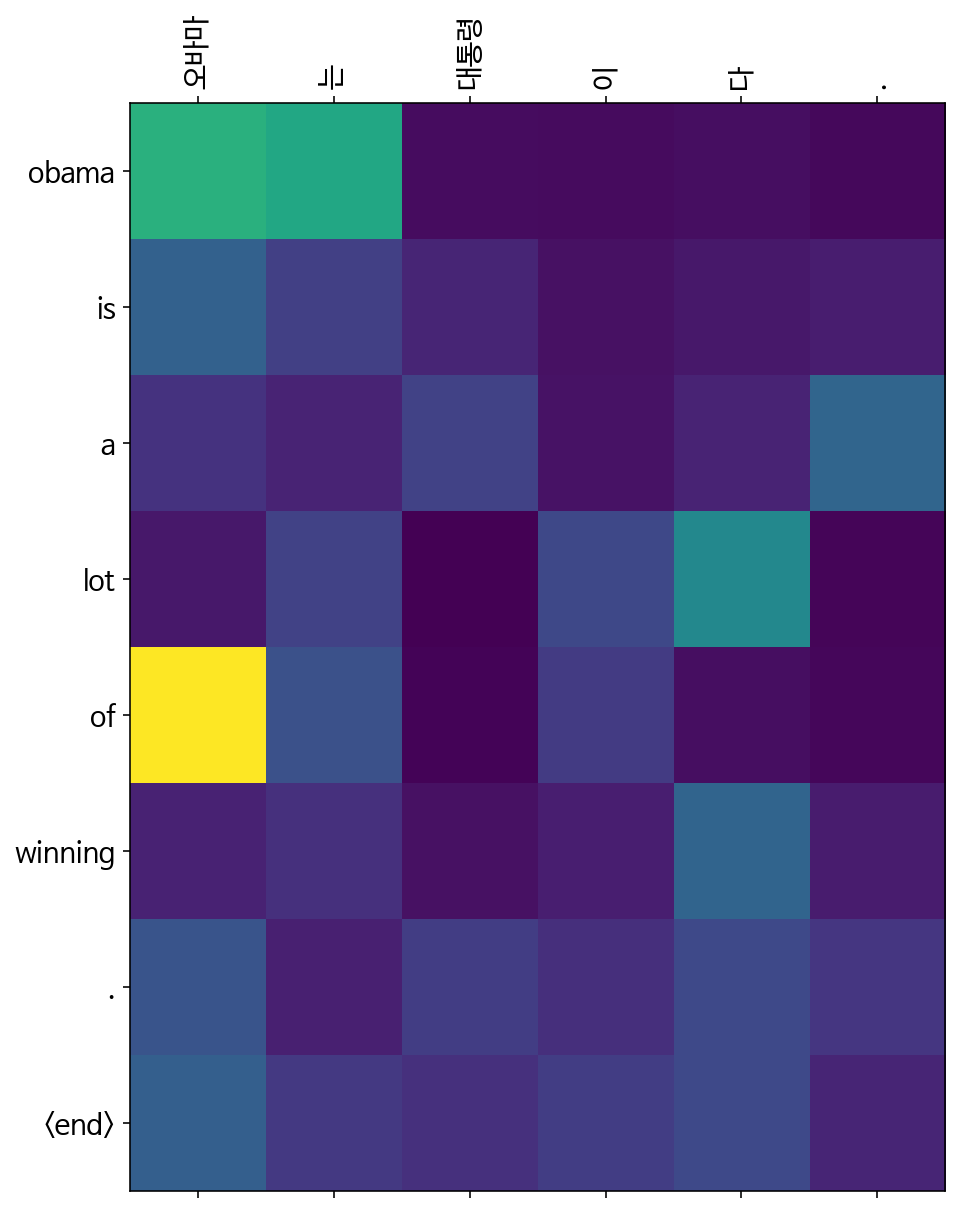

In [41]:
translate("Ïò§Î∞îÎßàÎäî ÎåÄÌÜµÎ†πÏù¥Îã§.", encoder, decoder)

Input: ['ÏãúÎØº', 'Îì§', 'ÏùÄ', 'ÎèÑÏãú', 'ÏÜç', 'Ïóê', 'ÏÇ∞Îã§', '.']
Predicted translation: they are in the city . <end> 


/tmp/ipykernel_79/2811506968.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
/tmp/ipykernel_79/2811506968.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)


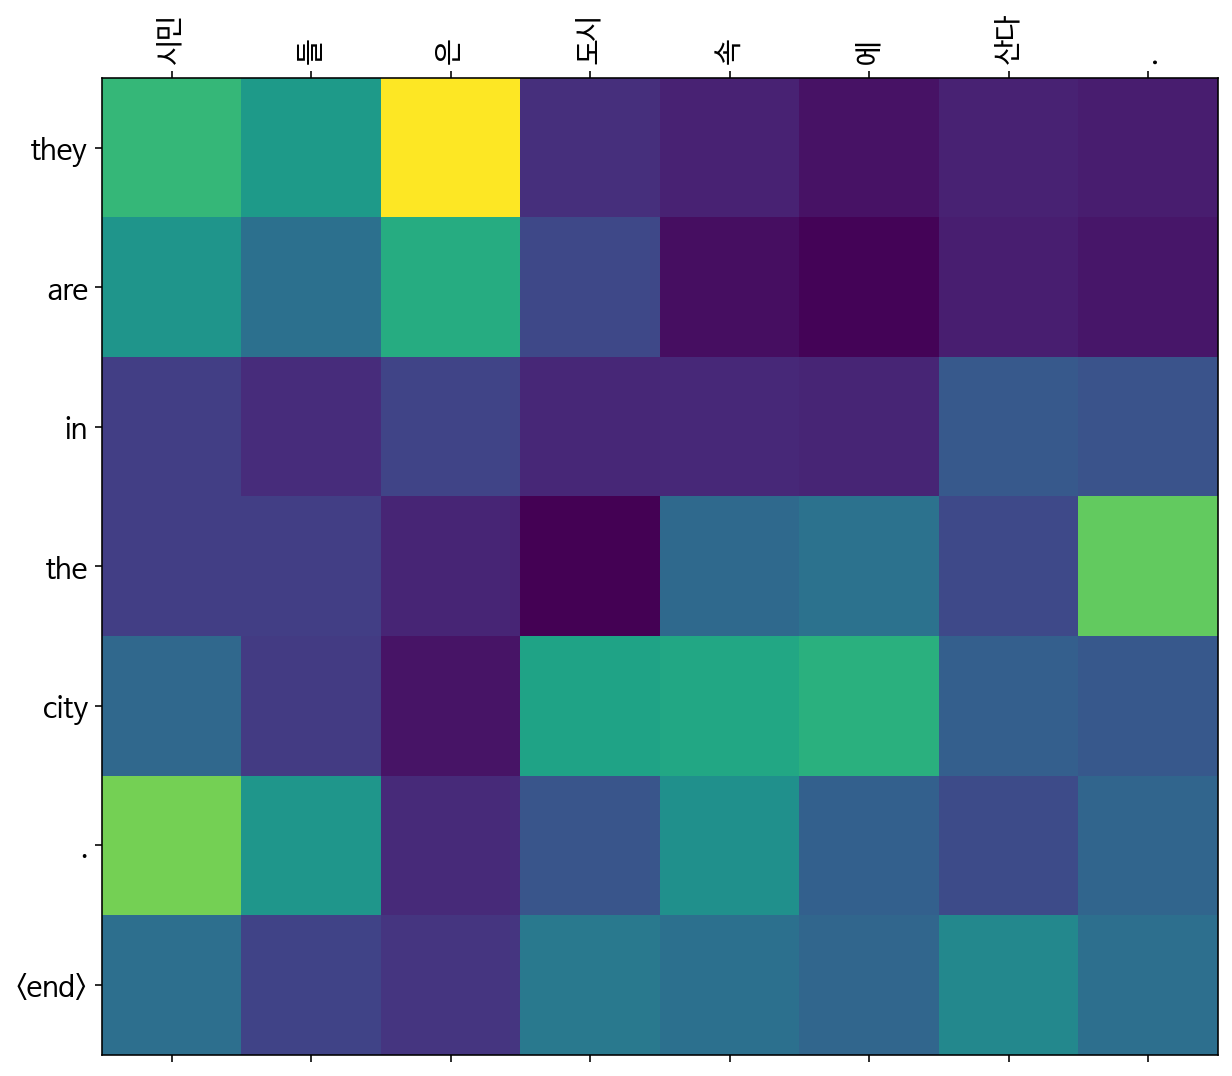

In [42]:
translate("ÏãúÎØºÎì§ÏùÄ ÎèÑÏãú ÏÜçÏóê ÏÇ∞Îã§.", encoder, decoder)

Input: ['Ïª§Ìîº', 'Îäî', 'ÌïÑÏöî', 'ÏóÜ', 'Îã§', '.']
Predicted translation: but it s not a cadillac , but it s not a cadillac , but it s not a cadillac , but it s not a cadillac , but it s not a cadillac , but it s not a 


/tmp/ipykernel_79/2811506968.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
/tmp/ipykernel_79/2811506968.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)


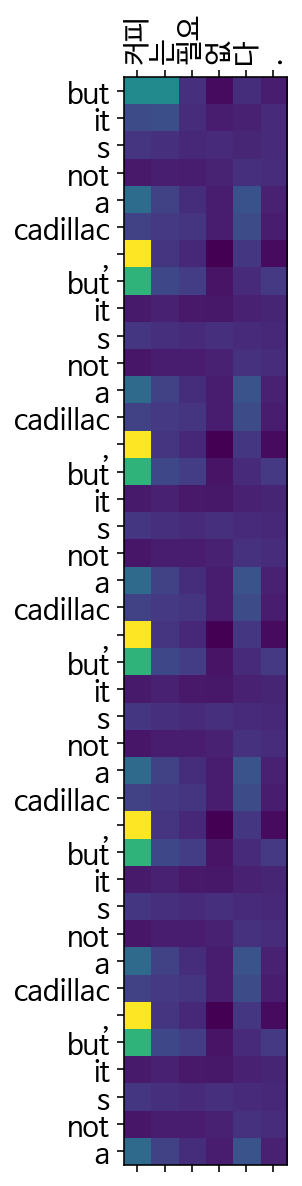

In [43]:
translate("Ïª§ÌîºÎäî ÌïÑÏöî ÏóÜÎã§.", encoder, decoder)

Input: ['ÏùºÍ≥±', 'Î™Ö', 'Ïùò', 'ÏÇ¨ÎßùÏûê', 'Í∞Ä', 'Î∞úÏÉù', 'Ìñà', 'Îã§', '.']
Predicted translation: seven people were killed . <end> 


/tmp/ipykernel_79/2811506968.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
/tmp/ipykernel_79/2811506968.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)


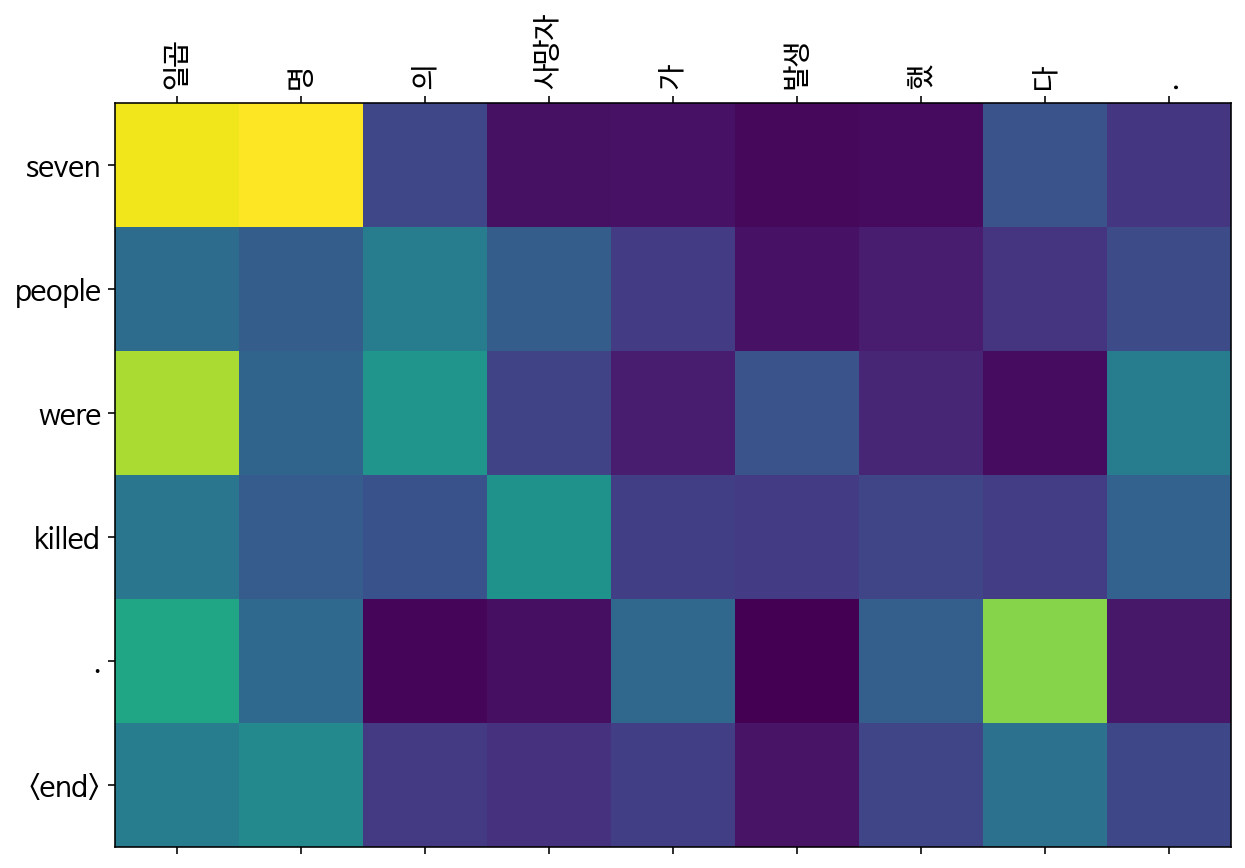

In [44]:
translate("ÏùºÍ≥± Î™ÖÏùò ÏÇ¨ÎßùÏûêÍ∞Ä Î∞úÏÉùÌñàÎã§.", encoder, decoder)

Input: ['Ìï´ÎèÑÍ∑∏', '3', 'Í∞ú', 'Ï£º', 'ÏÑ∏Ïöî', '.']
Predicted translation: thousands of people are being deported . <end> 


/tmp/ipykernel_79/2811506968.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
/tmp/ipykernel_79/2811506968.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)


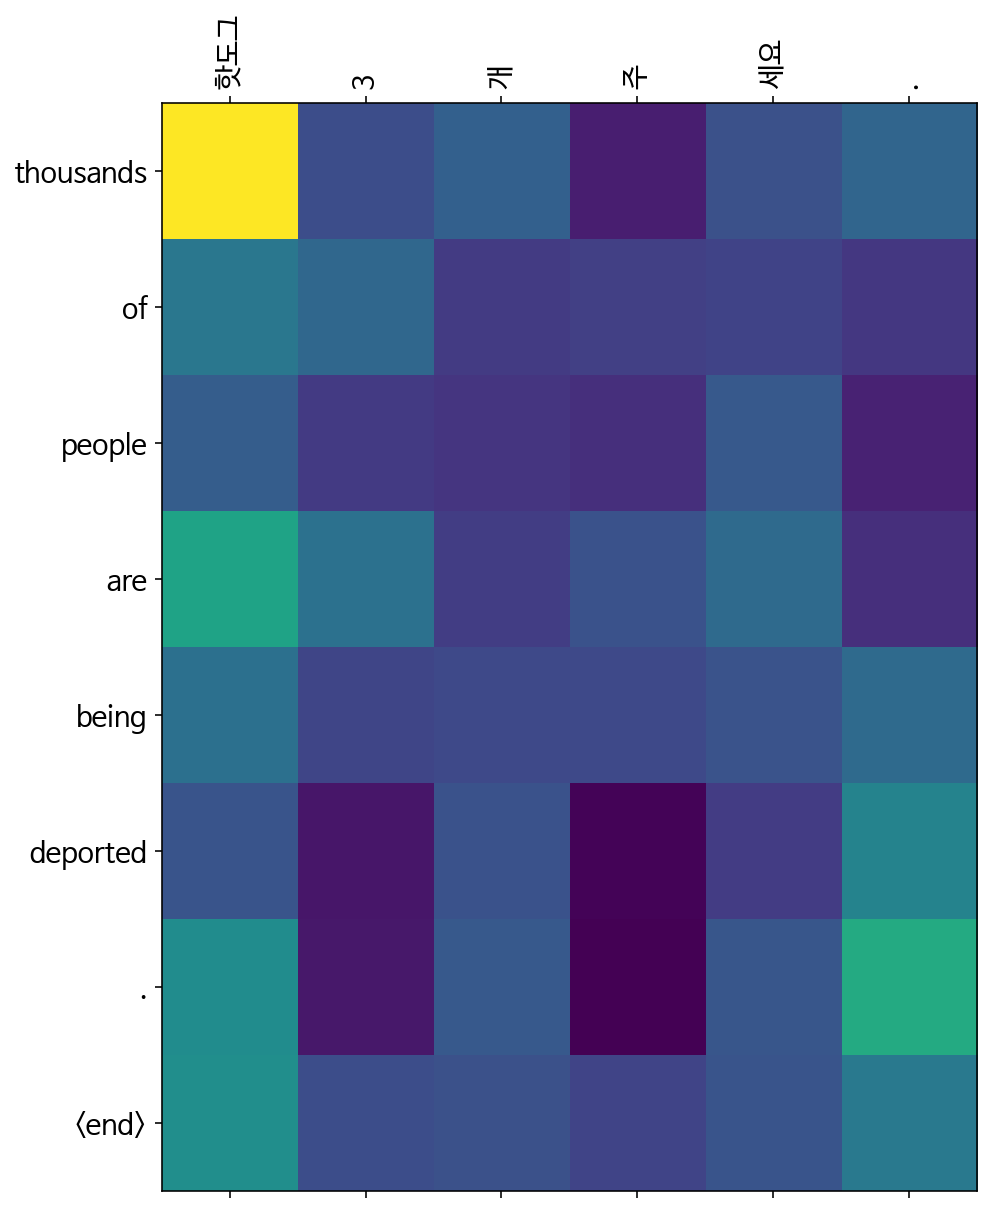

In [65]:
translate("Ìï´ÎèÑÍ∑∏ 3Í∞ú Ï£ºÏÑ∏Ïöî.", encoder, decoder)

Input: ['Ìï¥Î¶¨Ìè¨ÌÑ∞', 'Îäî', 'Ïû¨Î∞å', 'Îã§']
Predicted translation: harry potter and the ball was the best . <end> 


/tmp/ipykernel_79/2811506968.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
/tmp/ipykernel_79/2811506968.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)


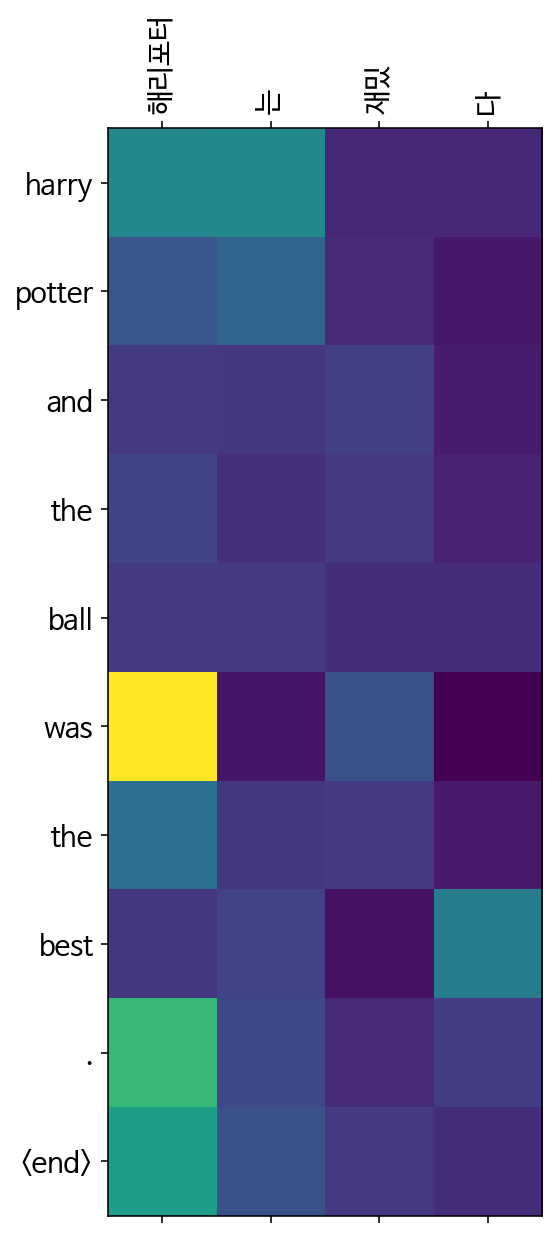

In [68]:
translate("Ìï¥Î¶¨Ìè¨ÌÑ∞Îäî Ïû¨Î∞åÎã§", encoder, decoder)

# üåû ÌöåÍ≥†
---

## 1) Í≤∞Í≥º
- ÏôÑÎ≤ΩÌïòÍ≤å Î≤àÏó≠Ïù¥ Ïûò ÎêòÎäî Í≤ÉÏùÄ ÏïÑÎãàÏßÄÎßå, Í∑∏ÎûòÎèÑ ÏñºÏ∂î ÏùòÎØ∏Í∞Ä ÎßûÍ≤å Î≤àÏó≠Ïù¥ Îêú Í≤ÉÎèÑ ÏûàÎã§.
- ÌïòÏßÄÎßå `Ïª§ÌîºÎäî ÌïÑÏöîÏóÜÎã§`, `Ìï´ÎèÑÍ∑∏ 3Í∞ú Ï£ºÏÑ∏Ïöî` Î¨∏Ïû•Í≥º Í∞ôÏù¥ ÏôÑÏ†Ñ Ïù¥ÏÉÅÌïòÍ≤å Í≤∞Í≥ºÍ∞íÏù¥ ÎÇòÏò§Í∏∞ÎèÑ ÌïúÎã§.
- Ï°∞Í∏à ÏùòÏïÑÌñàÎçò Î∂ÄÎ∂ÑÏùÄ ÎèåÎ¶¥ ÎïåÎßàÎã§ lossÍ∞íÏù¥ Îñ®Ïñ¥ÏßÄÎäî Í≤ÉÏù¥ ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÎÇ¨Îã§. (Î™®Îëê ÎèôÏùºÌïòÍ≤å ÏßÑÌñâÌñàÏúºÎÇò lossÍ∞íÏù¥ Í≥ÑÏÜç 3.xxÏù∏ Í≤ΩÏö∞ÎèÑ ÏûàÏóàÎã§. Í∑∏ÎûòÏÑú Îã§Ïãú ÏãúÌñâÌïú Í≤∞Í≥º lossÍ∞íÏù¥ Îñ®Ïñ¥ÏßÄÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏùå.)

## 2) ÏïÑÏâ¨Ïõ†Îçò Ï†ê
- Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌïú ÏïÑÏâ¨ÏõÄÏù¥ Í∞ÄÏû• Ïª∏Îã§.
- ÏùºÎ∂ÄÎü¨ Ï†ÑÏ≤òÎ¶¨Î•º Îçî Ïó¥Ïã¨Ìûà ÌïòÎùºÍ≥† Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ïù¥Î†áÍ≤å ÎßåÎì† Í±¥Í∞ÄÎùºÎäî ÏÉùÍ∞ÅÎèÑ Ìï¥Î≥¥ÏïòÎã§.
- Ï°∞Í∏à Îçî ÏùºÏ∞ç ÏãúÏûëÌñàÎçîÎùºÎ©¥ Ï†ÑÏ≤òÎ¶¨Î•º Îçî ÎßéÏù¥ Ìï¥Î¥§ÏùÑÌÖêÎç∞ Í∑∏Í≤ÉÎèÑ ÏïÑÏâ¨Ïõ†Îã§.

## 3) ÌõÑÍ∏∞
- ÏïûÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Îã§Î£∞ Îïå, Îç∞Ïù¥ÌÑ∞Î•º ÌïòÎÇòÏî© ÎúØÏñ¥Î≥¥Îäî ÏäµÍ¥ÄÏùÑ Îì§Ïó¨ÏïºÍ≤†Îã§Í≥† ÏÉùÍ∞ÅÏùÑ Ìï† Ïàò ÏûàÏóàÎçò ÌîÑÎ°úÏ†ùÌä∏ÏòÄÎã§.
- Ïó¨Ï†ÑÌûà AttentionÍ≥º Seq2seqÎäî Ïñ¥Î†µÎã§... Ïñ∏Ï†úÏØ§ ÎÇ¥ Î®∏Î¶ø ÏÜçÏóê ÏèòÏò• Îì§Ïñ¥Ïò¨Íπå...!

## 4) Ï∞∏Í≥†ÏûêÎ£å
- [Ïù¥Ï†Ñ Í∏∞Ïàò ÌîÑÎ°úÏ†ùÌä∏ ÍπÉÌóô1](https://github.com/Kwon-Seung-Min/AIFFEL-GoingDeeper/blob/main/GD8_final_ksm.ipynb)
- [Ïù¥Ï†Ñ Í∏∞Ïàò ÌîÑÎ°úÏ†ùÌä∏ ÍπÉÌóô2](https://github.com/miinkang/AI_Project_AIFFEL/blob/main/%5BGD-08%5Dattention_based_seq2seq_translation.ipynb)